In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coviddf/vacinacaoDF.csv
/kaggle/input/coviddf/dados-abertos.csv
/kaggle/input/coviddf/vacina.csv
/kaggle/input/coviddf/subgrupo.csv
/kaggle/input/coviddf/grupo.csv
/kaggle/input/coviddf/cepDF.csv


### dados_aberto.csv fiz download no:
https://covid19.ssp.df.gov.br/extensions/covid19/covid19.html#/

### os desmais data sets fiz download no banco de dados que meu professor disponibilizou dos dados de vacinação de Covid do Ministério da Saúde:

* Importo as bibliotecas necessárias para conexão e coleta dos dados

import psycopg2

import pandas as pd
from sqlalchemy import create_engine

* Descrevo os parâmetros de conexão conforme configurado

db_server_info = {'host': 'dbcdiaiesb.ca7zq9oeqx18.us-east-2.rds.amazonaws.com', 
                  'porta': 5432, 
                  'dbname': 'dbs_vacina',
                  'user': 'cdia_iesb', 
                  'password': 'JOqiAqnc3'} 

conn_str = '{}://{}:{}@{}:{}/{}'.format('postgresql+psycopg2', 
                                  db_server_info['user'], 
                                  db_server_info['password'], 
                                  db_server_info['host'], 
                                  db_server_info['porta'], 
                                  db_server_info['dbname']) 

alchemyEngine = create_engine(conn_str, pool_recycle=3600)

postgreSQLConnection = alchemyEngine.connect() 

* bases de dados

dfGrupo = pd.read_sql_query('SELECT * FROM pos.tbl_grupo', postgreSQLConnection)
dfSubgrupo = pd.read_sql_query('SELECT * FROM pos.tbl_subgrupo', postgreSQLConnection)

dfGrupo.to_csv('grupo.csv')
dfSubgrupo.to_csv('subgrupo.csv') 

dfCep = pd.read_sql_query('SELECT * FROM pos.tbl_cep WHERE id_cidade = 5300108', postgreSQLConnection)

dfCep.to_csv('cepDF.csv') 

dfVacinacao = pd.read_sql_query('SELECT * FROM pos.tbl_vacinacao as A INNER JOIN pos.tbl_paciente as B ON A.hash_paciente = B.hash WHERE B.id_cidade = 5300108 ', postgreSQLConnection)

dfVacinacao.to_csv('vacinacaoDF.csv')

dfVacina = pd.read_sql_query('SELECT * FROM pos.tbl_vacina', postgreSQLConnection)

dfVacina.to_csv('vacina.csv')

* Fechando essa base de dados

postgreSQLConnection.close()


## carregando dados

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
obitodf = pd.read_csv('/kaggle/input/coviddf/dados-abertos.csv', sep=';', encoding='utf-8',index_col=0)

In [4]:
vacina = pd.read_csv('/kaggle/input/coviddf/vacina.csv',index_col=0)
grupo = pd.read_csv('/kaggle/input/coviddf/grupo.csv',index_col=0)
subgrupo = pd.read_csv('/kaggle/input/coviddf/subgrupo.csv',index_col=0)

In [5]:
vacinacao = pd.read_csv('/kaggle/input/coviddf/vacinacaoDF.csv',index_col=0)

In [6]:
vacinacao.head().T

,0,1,2,3,4
id,879456,884047,888358,888369,889362
id_documento,64f74027-f10c-4cc0-b223-fefce4e1175a-i0b0,baee6faa-f535-47e9-8631-66b345890e7d-i0b0,0c9d60cf-1471-4828-bb4e-bac8a6d7eb01-i0b0,808f7504-9886-4b37-b71a-3374c2b9aed2-i0b0,265d7fb6-c0d2-4be8-8680-6f2066ebfb8f-i0b0
hash_paciente,c5106f2b14b6a67309171462166c8d42b8737d45442f41...,079408d80b0aa596c1c41bdcc22cd78eb9a0e7dd380b93...,ce16533ab45e900429d29d30da63335c547b65f0ee0c58...,aa6080577d450fe7d631143550df2da1a4088285b20949...,f8baf1d1b8b6fbcdeeb9493e32fc88161af0a085a77a5a...
estabelecimento_id,7368895,2381524,10847,10626,9698752
data_aplicacao,2021-02-03,2021-02-19,2021-02-02,2021-02-02,2021-02-23
vacina_id,85,86,85,86,86
vacina_lote,4120Z005,200279,4120Z005,202010021,200279
dose_declarada,1,1,1,1,1
sistema_origem,Novo PNI,Novo PNI,Novo PNI,Novo PNI,Novo PNI
data_importacao,2021-02-09,2021-02-22,2021-02-02,2021-02-02,2021-02-23


## análise vacinacao

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_palette('pastel')

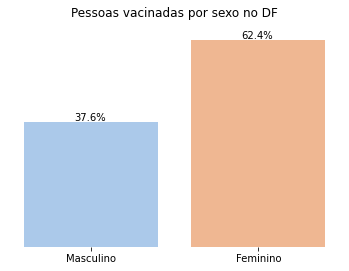

In [8]:
sexovac= sns.countplot(x='sexo',data=vacinacao)

sexovac.set_title('Pessoas vacinadas por sexo no DF', y=1.03)

sns.despine(left=True, bottom=True) #retirando os eixos
sexovac.set(xlabel='',
            ylabel='')

total = len(vacinacao['sexo'])*1.
for p in sexovac.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + 0.3
    y = p.get_y() + p.get_height() + 1000
    sexovac.annotate(percentage, (x, y))

sexovac.axes.get_yaxis().set_visible(False) #tornando os valores do eixo y invisivel
plt.xticks(np.arange(2), ['Masculino', 'Feminino'])
plt.show()

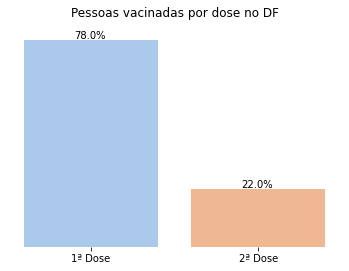

In [9]:
dosevac= sns.countplot(x='dose_declarada',data=vacinacao)

dosevac.set_title('Pessoas vacinadas por dose no DF', y=1.03)
sns.despine(left=True, bottom=True) #retirando os eixos
dosevac.set(xlabel='',
            ylabel='')

total = len(vacinacao['dose_declarada'])*1.
for p in dosevac.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + 0.3
    y = p.get_y() + p.get_height() + 1000
    dosevac.annotate(percentage, (x, y))

dosevac.axes.get_yaxis().set_visible(False) #tornando os valores do eixo y invisivel
plt.xticks(np.arange(2), ['1ª Dose', '2ª Dose'])
plt.show()

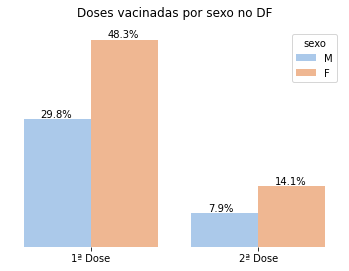

In [10]:
dosevac= sns.countplot(x='dose_declarada',data=vacinacao, hue='sexo')

dosevac.set_title('Doses vacinadas por sexo no DF', y=1.03)
sns.despine(left=True, bottom=True) #retirando os eixos
dosevac.set(xlabel='',
            ylabel='')

total = len(vacinacao['dose_declarada'])*1.
for p in dosevac.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + 0.1
    y = p.get_y() + p.get_height() + 1000
    dosevac.annotate(percentage, (x, y))

dosevac.axes.get_yaxis().set_visible(False) #tornando os valores do eixo y invisivel
plt.xticks(np.arange(2), ['1ª Dose', '2ª Dose'])
plt.show()

In [11]:
# unindo o DF vacinacao com vacina p/ ter os nomes referentes a vacina
vacinas = pd.merge(vacinacao, vacina, right_on="id", left_on="vacina_id")
vacinas.drop(columns='vacina_id', axis=1, inplace=True)

In [12]:
vacinas['id_y'].value_counts(normalize=True)

86    0.757976
85    0.242011
87    0.000009
81    0.000004
Name: id_y, dtype: float64

In [13]:
# filtrando as linhas q a vacina é 85 ou 86

vacinas=vacinas.loc[(vacinas['id_y']== 85) | (vacinas['id_y']== 86)]

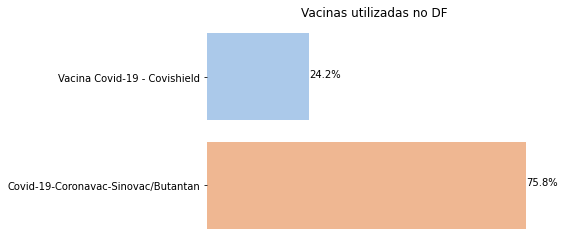

In [14]:
ax= sns.countplot(y='nome_vacina',data=vacinas)

total = len(vacinas['nome_vacina'])*1.

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
sns.despine(left=True, bottom=True) #retirando os eixos
ax.set(xlabel='',
       ylabel='',
       title='Vacinas utilizadas no DF')
ax.axes.get_xaxis().set_visible(False) #tornando os valores do eixo x invisivel
plt.show()

In [15]:
import datetime as dt
# transformando em datetime
vacinacao['data_aplicacao'] = pd.to_datetime(vacinacao['data_aplicacao'])

# contando aplicacoes por dia da vacina
vacinacao['aplicacoes_por_data'] = vacinacao['data_aplicacao'].map(vacinacao['data_aplicacao'].value_counts())


In [16]:
vacinacao['mes'] = vacinacao['data_aplicacao'].dt.month
vacinacao['dia'] =  vacinacao['data_aplicacao'].dt.day
vacinacao['dia_semana'] = vacinacao['data_aplicacao'].dt.dayofweek

In [17]:
janeiro=vacinacao[vacinacao['mes'] == 1]
fevereiro=vacinacao[vacinacao['mes'] == 2]
marco=vacinacao[vacinacao['mes'] == 3]
abril=vacinacao[vacinacao['mes'] == 4]

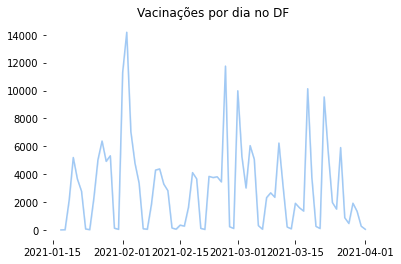

In [18]:
vac_dia=sns.lineplot(x='data_aplicacao', y='aplicacoes_por_data', data=vacinacao)
sns.despine(left=True, bottom=True) #retirando os eixos
vac_dia.set(xlabel='',
       ylabel='',
       title='Vacinações por dia no DF')

#plt.xticks(np.arange(6), ['15/01', '01/02', '15/02', '01/03', '15/03', '01/04'])
plt.show()

In [19]:
janeiro['aplicacoes_por_data'].max()

6379

In [20]:
fevereiro['aplicacoes_por_data'].max()

14182

In [21]:
marco['aplicacoes_por_data'].max()

10131

In [22]:
abril['aplicacoes_por_data'].max()

47

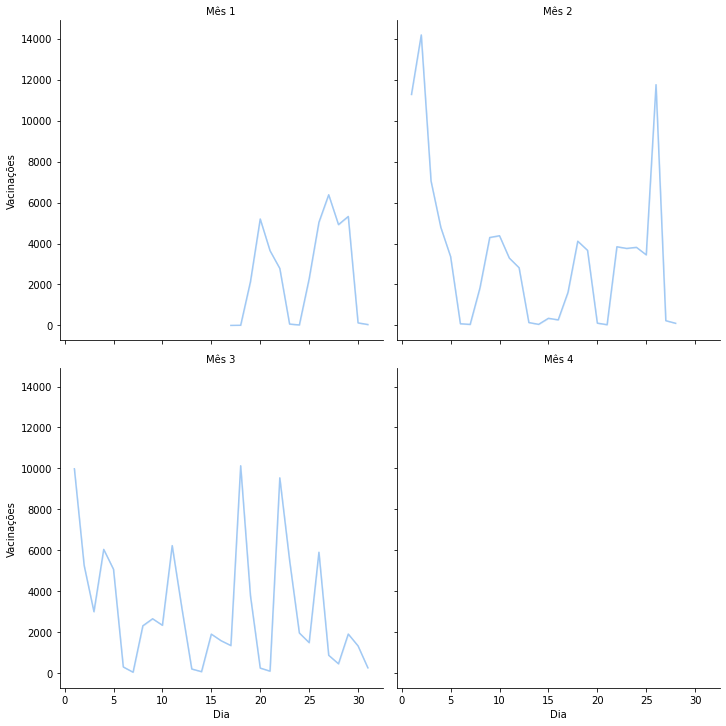

In [23]:
m=sns.relplot( x='dia', y='aplicacoes_por_data', data=vacinacao, col='mes',col_wrap=2, kind='line')

m.fig.suptitle('Pessoas vacinadas no DF', y=1.03)

m.set(ylabel='Vacinações',
       xlabel='Dia')
m.set_titles('Mês {col_name}')
plt.show()

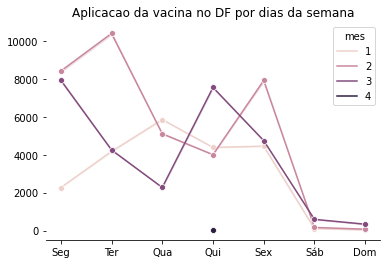

In [24]:
dsvac=sns.lineplot( x='dia_semana', y='aplicacoes_por_data', data=vacinacao, hue='mes', marker = 'o')


sns.despine(left=True) #retirando os eixos
dsvac.set(xlabel='',
       ylabel='',
       title='Aplicacao da vacina no DF por dias da semana')

ticks = list(range(0, 7)) # pontos do eixo x
labels = "Seg Ter Qua Qui Sex Sáb Dom".split()
plt.xticks(ticks, labels)
plt.show()

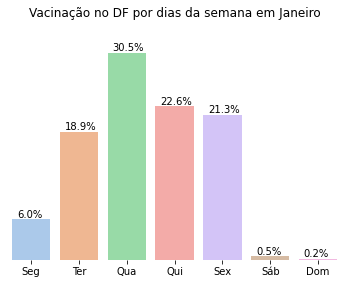

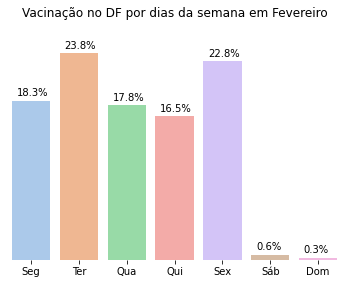

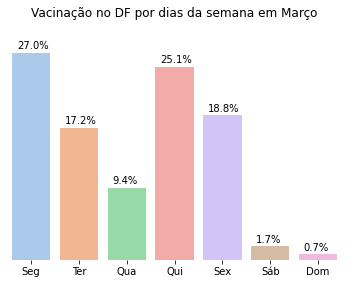

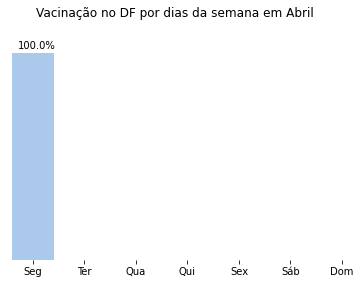

In [25]:
jvac=sns.countplot(x='dia_semana', data=janeiro)


sns.despine(left=True, bottom=True) #retirando os eixos
jvac.set(xlabel='',
       ylabel='')
jvac.set_title('Vacinação no DF por dias da semana em Janeiro', y=1.09)

# anotar porcentagem
total = len(janeiro['dia_semana'])*1.
for p in jvac.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + 0.1
    y = p.get_y() + p.get_height()+ 100
    jvac.annotate(percentage, (x, y))

jvac.axes.get_yaxis().set_visible(False) #tornando os valores do eixo y invisivel

ticks = list(range(0, 7)) # pontos do eixo x
labels = "Seg Ter Qua Qui Sex Sáb Dom".split()
plt.xticks(ticks, labels)
plt.show()

# fevereiro
fvac=sns.countplot(x='dia_semana', data=fevereiro)


sns.despine(left=True, bottom=True) #retirando os eixos
fvac.set(xlabel='',
       ylabel='')
fvac.set_title('Vacinação no DF por dias da semana em Fevereiro', y=1.09)

# anotar porcentagem
total = len(fevereiro['dia_semana'])*1.
for p in fvac.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + 0.1
    y = p.get_y() + p.get_height() + 500
    fvac.annotate(percentage, (x, y))

fvac.axes.get_yaxis().set_visible(False) #tornando os valores do eixo y invisivel

ticks = list(range(0, 7)) # pontos do eixo x
labels = "Seg Ter Qua Qui Sex Sáb Dom".split()
plt.xticks(ticks, labels)
plt.show()

#março
mvac=sns.countplot(x='dia_semana', data=marco)


sns.despine(left=True, bottom=True) #retirando os eixos
mvac.set(xlabel='',
       ylabel='')
mvac.set_title('Vacinação no DF por dias da semana em Março', y=1.09)

# anotar porcentagem
total = len(marco['dia_semana'])*1.
for p in mvac.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + 0.1
    y = p.get_y() + p.get_height() + 500
    mvac.annotate(percentage, (x, y))

mvac.axes.get_yaxis().set_visible(False) #tornando os valores do eixo y invisivel

ticks = list(range(0, 7)) # pontos do eixo x
labels = "Seg Ter Qua Qui Sex Sáb Dom".split()
plt.xticks(ticks, labels)
plt.show()

#abril
avac=sns.countplot(x='dia_semana', data=abril)


sns.despine(left=True, bottom=True) #retirando os eixos
avac.set(xlabel='',
       ylabel='')
avac.set_title('Vacinação no DF por dias da semana em Abril', y=1.09)

# anotar porcentagem
total = len(abril['dia_semana'])*1.
for p in avac.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + 0.1
    y = p.get_y() + p.get_height() + 1
    avac.annotate(percentage, (x, y))

avac.axes.get_yaxis().set_visible(False) #tornando os valores do eixo y invisivel

ticks = list(range(0, 7)) # pontos do eixo x
labels = "Seg Ter Qua Qui Sex Sáb Dom".split()
plt.xticks(ticks, labels)
plt.show()

## Criando coluna idade

In [26]:
vacinacao.head().T

,0,1,2,3,4
id,879456,884047,888358,888369,889362
id_documento,64f74027-f10c-4cc0-b223-fefce4e1175a-i0b0,baee6faa-f535-47e9-8631-66b345890e7d-i0b0,0c9d60cf-1471-4828-bb4e-bac8a6d7eb01-i0b0,808f7504-9886-4b37-b71a-3374c2b9aed2-i0b0,265d7fb6-c0d2-4be8-8680-6f2066ebfb8f-i0b0
hash_paciente,c5106f2b14b6a67309171462166c8d42b8737d45442f41...,079408d80b0aa596c1c41bdcc22cd78eb9a0e7dd380b93...,ce16533ab45e900429d29d30da63335c547b65f0ee0c58...,aa6080577d450fe7d631143550df2da1a4088285b20949...,f8baf1d1b8b6fbcdeeb9493e32fc88161af0a085a77a5a...
estabelecimento_id,7368895,2381524,10847,10626,9698752
data_aplicacao,2021-02-03 00:00:00,2021-02-19 00:00:00,2021-02-02 00:00:00,2021-02-02 00:00:00,2021-02-23 00:00:00
vacina_id,85,86,85,86,86
vacina_lote,4120Z005,200279,4120Z005,202010021,200279
dose_declarada,1,1,1,1,1
sistema_origem,Novo PNI,Novo PNI,Novo PNI,Novo PNI,Novo PNI
data_importacao,2021-02-09,2021-02-22,2021-02-02,2021-02-02,2021-02-23


In [27]:
# transformando em datetime
vacinacao['nascimento'] = pd.to_datetime(vacinacao['nascimento'])

vacinacao['idade'] = vacinacao['data_aplicacao'] - vacinacao['nascimento']
vacinacao['idade'] = vacinacao['idade'].dt.days

#transformando dias em anos
vacinacao['idade'] = vacinacao['idade']/365.25

# transformando pra int a coluna idade
vacinacao['idade'] = vacinacao['idade'].apply(np.int64)

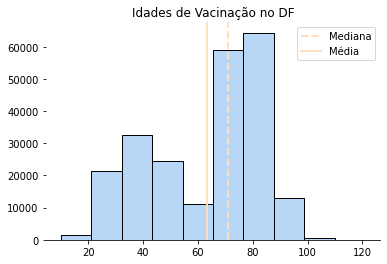

(71.0, 63.25547730314399)

In [28]:

ax=sns.histplot(vacinacao['idade'], bins=10)

sns.despine(left=True) #retirando os eixos
ax.set(xlabel="", 
       ylabel="",
       title="Idades de Vacinação no DF")

# linhas verticais com mediana e média
mediana=vacinacao['idade'].median()
media=vacinacao['idade'].mean()
ax.axvline(x=mediana, color='#ffddbd', label='Mediana', linestyle='--', linewidth=2)
ax.axvline(x=media, color='#ffddbd', label='Média', linestyle='-', linewidth=2)

# apresenta a legenda e o gráfico
ax.legend()
plt.show()

mediana, media

In [29]:
vacinacao['idade'].max()

121

In [30]:
vacinacao['idade'].min()

10

## as pessoas que estão com 121 anos são profissionais da saúde, entre eles médicos, enfermeiros e auxiliares de enfermagem... a pessoa mais velha identificada no Brasil tem 116 anos! 

In [31]:
vacinacao=vacinacao[vacinacao['idade'] <= 115]

## ainda não foi vacinado nenhum menor de idade, porém os dados me retornaram 36 casos

In [32]:
vacinacao[vacinacao['idade'] < 18]

,id,id_documento,hash_paciente,estabelecimento_id,data_aplicacao,vacina_id,vacina_lote,dose_declarada,sistema_origem,data_importacao,...,id_cidade,id_cep,id_raca_cor,id_grupo,id_subgrupo,aplicacoes_por_data,mes,dia,dia_semana,idade
3466,3482064,0b4f3d4d-5e7d-4950-9f0f-64a99649184e-i0b0,d700526f593e36224b87a67a892aa7cedae4e4cf4aedbf...,11010,2021-02-24,86,210013,2,Novo PNI,2021-02-24,...,5300108,NaN,99,9.0,926,3813,2,24,2,16
9214,7014618,480e9bb1-182d-4a47-8342-21cc1fcec9ee-i0b0,d700526f593e36224b87a67a892aa7cedae4e4cf4aedbf...,10995,2021-01-27,86,202010021,1,Novo PNI,2021-02-03,...,5300108,NaN,99,9.0,926,6379,1,27,2,16
9299,3766045,c4f71a4d-6a7b-40a0-8987-4776ef3297e2-i0b0,0fdf239467e44469ecba246513d3cea7891b4bffa63a06...,11150,2021-02-01,85,4120Z005,1,Novo PNI,2021-02-22,...,5300108,71571.0,99,9.0,926,11277,2,1,0,17
9939,7403889,7e442668-e761-4686-b41c-e3be530fccb5-i0b0,9cda726ba5b6da4ad6c674fcf5fa7a088b9c223b9695c2...,10723,2021-02-02,85,4120Z005,1,Novo PNI,2021-03-03,...,5300108,71050.0,1,9.0,926,14182,2,2,1,17
14419,6685473,ca83df44-fdac-44c4-9ee4-df55d6fe3396-i0b0,1ddcaaa25b5a44d42f2bece590681bd6dfa5cc9a529e04...,2437686,2021-02-04,85,4120Z005,1,Novo PNI,2021-02-18,...,5300108,NaN,99,9.0,920,4787,2,4,3,14
16209,11179635,80673cf3-5e7d-4151-816d-82212a657ba5-i0b0,1f27966172dd0c86b731db120c67346816bf23328c91a5...,9056963,2021-02-05,85,4120Z005,1,Novo PNI,2021-03-12,...,5300108,72308.0,3,9.0,926,3359,2,5,4,17
23941,16221854,5175d1d0-eb92-4858-bc10-343254264f32-i0b0,3248f247ab3b8913e410054c4f4f3138a22edfe8f24d66...,10723,2021-03-18,86,210049,1,Novo PNI,2021-03-31,...,5300108,71725.0,99,9.0,929,10131,3,18,3,16
29198,2176467,11de58c5-cbc4-4f8a-a5ce-6a20271799c4-i0b0,9278f957e781eef6bd9831807aacd9012eceae5dfa61d4...,10758,2021-02-10,86,202010036,2,Novo PNI,2021-02-22,...,5300108,72669.0,99,9.0,905,4379,2,10,2,17
35052,5556235,6a880125-90f8-46ff-a8cf-ddb8460d4f2e-i0b0,00dcabfd0689fc60fd128fc870cbd5f0cbfcf8d646801a...,2022699,2021-03-05,86,210041,2,VACIVIDA,2021-03-05,...,5300108,72620.0,3,9.0,926,5077,3,5,4,10
36167,6487800,4f0ae31d-551d-41e5-a00c-f169a6426898-i0b0,e4bd7406b3a3331720b3cac9d267ace1200cf9ae1b3df0...,11126,2021-02-10,86,202010036,2,Novo PNI,2021-02-13,...,5300108,NaN,3,3.0,301,4379,2,10,2,15


In [33]:
grupo

,id,grupo
0,1,Comorbidades
1,11,Pessoas com Deficiência
2,12,Pessoas em Situação de Rua
3,13,Trabalhadores Portuários
4,14,Funcionário do Sistema de Privação de Liberdade
5,15,População Privada de Liberdade
6,16,Trabalhadores Industriais
7,2,Faixa Etária
8,3,Pessoas de 60 anos ou mais institucionalizadas
9,4,Forças Armadas (membros ativos)


In [34]:
vacinacao_idosos = vacinacao.loc[(vacinacao['id_grupo'] == 2)]
vacinacao_saude = vacinacao.loc[(vacinacao['id_grupo'] == 9)]

In [35]:
#substituindo idade de grupo faixa etária que está menor que 18 pela mediana de idade
vacinacao.loc[(vacinacao['idade'] < 18) & (vacinacao['id_grupo'] == 2), 'idade'] = vacinacao_idosos['idade'].median()

In [36]:
vacinacao.loc[(vacinacao['idade'] < 18) & (vacinacao['id_grupo'] == 2)]

,id,id_documento,hash_paciente,estabelecimento_id,data_aplicacao,vacina_id,vacina_lote,dose_declarada,sistema_origem,data_importacao,...,id_cidade,id_cep,id_raca_cor,id_grupo,id_subgrupo,aplicacoes_por_data,mes,dia,dia_semana,idade


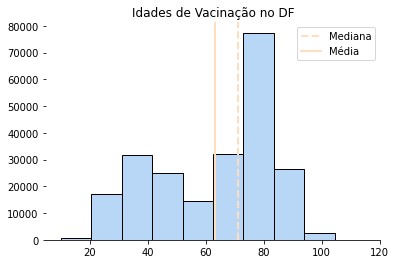

(71.0, 63.25528871258628)

In [37]:
ax=sns.histplot(vacinacao['idade'], bins=10)

sns.despine(left=True) #retirando os eixos
ax.set(xlabel="", 
       ylabel="",
       title="Idades de Vacinação no DF")

# linhas verticais com mediana e média
mediana=vacinacao['idade'].median()
media=vacinacao['idade'].mean()
ax.axvline(x=mediana, color='#ffddbd', label='Mediana', linestyle='--', linewidth=2)
ax.axvline(x=media, color='#ffddbd', label='Média', linestyle='-', linewidth=2)

# apresenta a legenda e o gráfico
ax.legend()
plt.show()
mediana, media

In [38]:
vacinacao['idade'].describe()

count    227891.000000
mean         63.255289
std          20.268256
min          10.000000
25%          44.000000
50%          71.000000
75%          79.000000
max         115.000000
Name: idade, dtype: float64

In [39]:
# unindo o DF vacinacao com grupo p/ ter os nomes referentes aos grupos
vacinacao = pd.merge(vacinacao, grupo, right_on="id", left_on="id_grupo")
vacinacao.drop(columns='id_grupo', axis=1, inplace=True)

In [40]:
vacinacao.head().T

,0,1,2,3,4
id_x,879456,884047,888358,888369,889362
id_documento,64f74027-f10c-4cc0-b223-fefce4e1175a-i0b0,baee6faa-f535-47e9-8631-66b345890e7d-i0b0,0c9d60cf-1471-4828-bb4e-bac8a6d7eb01-i0b0,808f7504-9886-4b37-b71a-3374c2b9aed2-i0b0,265d7fb6-c0d2-4be8-8680-6f2066ebfb8f-i0b0
hash_paciente,c5106f2b14b6a67309171462166c8d42b8737d45442f41...,079408d80b0aa596c1c41bdcc22cd78eb9a0e7dd380b93...,ce16533ab45e900429d29d30da63335c547b65f0ee0c58...,aa6080577d450fe7d631143550df2da1a4088285b20949...,f8baf1d1b8b6fbcdeeb9493e32fc88161af0a085a77a5a...
estabelecimento_id,7368895,2381524,10847,10626,9698752
data_aplicacao,2021-02-03 00:00:00,2021-02-19 00:00:00,2021-02-02 00:00:00,2021-02-02 00:00:00,2021-02-23 00:00:00
vacina_id,85,86,85,86,86
vacina_lote,4120Z005,200279,4120Z005,202010021,200279
dose_declarada,1,1,1,1,1
sistema_origem,Novo PNI,Novo PNI,Novo PNI,Novo PNI,Novo PNI
data_importacao,2021-02-09,2021-02-22,2021-02-02,2021-02-02,2021-02-23


In [41]:
vacinacao['grupo'].value_counts()

Faixa Etária                                       133928
Trabalhadores de Saúde                              88915
Pessoas de 60 anos ou mais institucionalizadas       2471
Pessoas com Deficiência                               643
Comorbidades                                          634
Forças de Segurança e Salvamento                      566
Povos Indígenas                                       172
Povos e Comunidades Tradicionais                      149
Forças Armadas (membros ativos)                        88
Trabalhadores da Educação                              41
População Privada de Liberdade                         13
Funcionário do Sistema de Privação de Liberdade        11
Pessoas em Situação de Rua                              6
Trabalhadores Industriais                               3
Trabalhadores Portuários                                1
Name: grupo, dtype: int64

In [42]:
vacinacao_ = vacinacao.loc[(vacinacao['id_y'] == 9)| (vacinacao['id_y'] == 2)]

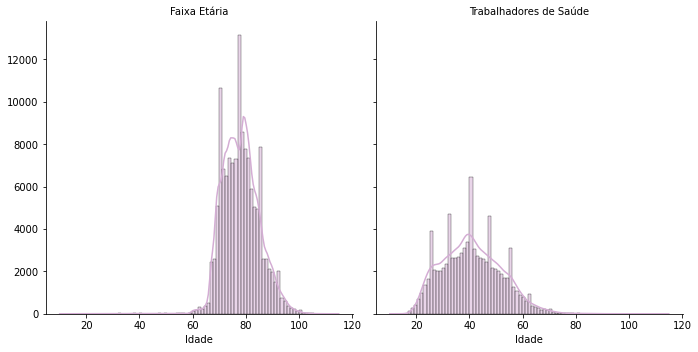

In [43]:
vacgp= sns.displot(vacinacao_, x="idade", col="grupo", col_wrap=2, kde=True,color='#d4add4')

#m.fig.suptitle('Pessoas vacinadas no DF', y=1.03)

vacgp.set(ylabel='',
       xlabel='Idade')
vacgp.set_titles('{col_name}')
plt.show()

In [44]:
vacinacao_idosos = vacinacao.loc[(vacinacao['id_y'] == 2)]
vacinacao_saude = vacinacao.loc[(vacinacao['id_y'] == 9)]

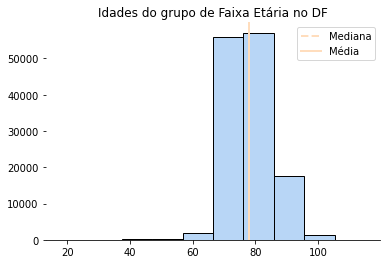

(78.0, 78.09929962367839)

In [45]:
ax=sns.histplot(vacinacao_idosos['idade'], bins=10)

sns.despine(left=True) #retirando os eixos
ax.set(xlabel="", 
       ylabel="",
       title="Idades do grupo de Faixa Etária no DF")

# linhas verticais com mediana e média
mediana=vacinacao_idosos['idade'].median()
media=vacinacao_idosos['idade'].mean()
ax.axvline(x=mediana, color='#ffddbd', label='Mediana', linestyle='--', linewidth=2)
ax.axvline(x=media, color='#ffddbd', label='Média', linestyle='-', linewidth=2)

# apresenta a legenda e o gráfico
ax.legend()
plt.show()
mediana,media

In [46]:
vacinacao_idosos['idade'].describe()

count    133928.000000
mean         78.099300
std           7.001465
min          18.000000
25%          73.000000
50%          78.000000
75%          82.000000
max         115.000000
Name: idade, dtype: float64

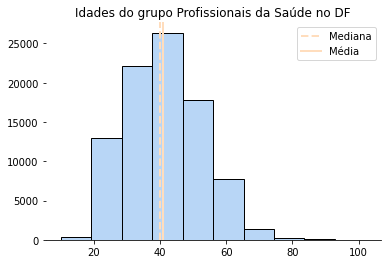

(40.0, 40.89473092279143)

In [47]:
ax=sns.histplot(vacinacao_saude['idade'], bins=10)

sns.despine(left=True) #retirando os eixos
ax.set(xlabel="", 
       ylabel="",
       title="Idades do grupo Profissionais da Saúde no DF")

# linhas verticais com mediana e média
mediana=vacinacao_saude['idade'].median()
media=vacinacao_saude['idade'].mean()
ax.axvline(x=mediana, color='#ffddbd', label='Mediana', linestyle='--', linewidth=2)
ax.axvline(x=media, color='#ffddbd', label='Média', linestyle='-', linewidth=2)

# apresenta a legenda e o gráfico
ax.legend()
plt.show()
mediana, media

In [48]:
vacinacao_saude['idade'].describe()

count    88915.000000
mean        40.894731
std         11.136216
min         10.000000
25%         32.000000
50%         40.000000
75%         49.000000
max        102.000000
Name: idade, dtype: float64

In [49]:
janeiro['dia'].unique()

array([19, 28, 22, 29, 20, 27, 21, 26, 25, 23, 30, 24, 31, 18, 17])

## analisar o df óbito

## a vacinação começou dia 17/01, p/ analisar se o perfil de idade de obitos mudou dividirei o dado a partir de 7 dias do início da vacinaçao no DF 24/01

In [50]:
obitodf

,Data Cadastro,Sexo,Faixa Etária,RA,UF,Óbito,dataPrimeirosintomas,Idade,Pneumopatia,Nefropatia,Doença Hematológica,Distúrbios Metabólicos,Imunopressão,Obesidade,Outros,Cardiovasculopatia
Data,,,,,,,,,,,,,,,,
04/04/2021,2020-03-18,Masculino,50 a 59 anos,Plano Piloto,DISTRITO FEDERAL,Não,23/04/2020,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04/04/2021,2020-03-18,Masculino,50 a 59 anos,Plano Piloto,DISTRITO FEDERAL,Não,03/08/2020,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04/04/2021,2020-03-18,Masculino,40 a 49 anos,Lago Sul,DISTRITO FEDERAL,Não,09/03/2020,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04/04/2021,2020-03-18,Masculino,>= 60 anos,Águas Claras,DISTRITO FEDERAL,Não,14/03/2020,63,NaN,NaN,NaN,Sim,NaN,NaN,NaN,Sim
04/04/2021,2020-03-18,Feminino,20 a 29 anos,Plano Piloto,DISTRITO FEDERAL,Não,14/03/2020,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
04/04/2021,04/04/2021,Masculino,<= 19 anos,Taguatinga,DISTRITO FEDERAL,Não,07/03/2021,15,NaN,NaN,NaN,NaN,NaN,Sim,NaN,NaN
04/04/2021,04/04/2021,Feminino,20 a 29 anos,Ceilândia,DISTRITO FEDERAL,Não,15/03/2021,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04/04/2021,04/04/2021,Masculino,20 a 29 anos,Guará,DISTRITO FEDERAL,Não,08/02/2021,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
obitodf['UF'].unique()

array(['DISTRITO FEDERAL', 'SÃO PAULO', 'RIO DE JANEIRO', 'MINAS GERAIS',
       'SANTA CATARINA', 'AMAPÁ', 'PARANÁ', 'PARAÍBA', 'GOIÁS', 'ACRE',
       'BAHIA', 'MARANHÃO', 'TOCANTINS', 'PARÁ', 'PERNAMBUCO', 'PIAUÍ',
       nan, ' ', 'RIO GRANDE DO SUL', 'ESPÍRITO SANTO',
       'MATO GROSSO DO SUL', 'AMAZONAS', 'RORAIMA', 'RIO GRANDE DO NORTE',
       'CEARÁ', 'RONDÔNIA', 'ALAGOAS', 'MATO GROSSO', 'SERGIPE'],
      dtype=object)

In [52]:
obitodf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349775 entries, 04/04/2021 to 04/04/2021
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Data Cadastro           349724 non-null  object
 1   Sexo                    349775 non-null  object
 2   Faixa Etária            349775 non-null  object
 3   RA                      335603 non-null  object
 4   UF                      334618 non-null  object
 5   Óbito                   349775 non-null  object
 6   dataPrimeirosintomas    349775 non-null  object
 7   Idade                   349775 non-null  int64 
 8   Pneumopatia             4968 non-null    object
 9   Nefropatia              2102 non-null    object
 10  Doença Hematológica     1055 non-null    object
 11  Distúrbios Metabólicos  9734 non-null    object
 12  Imunopressão            2692 non-null    object
 13  Obesidade               2939 non-null    object
 14  Outros                  2506

In [53]:
# selecionando quem mora no DF
obitodf=obitodf[obitodf['UF'] == 'DISTRITO FEDERAL']

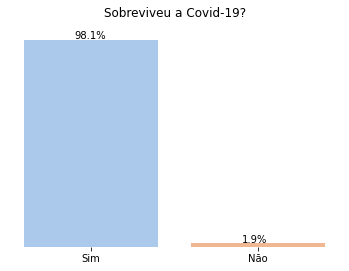

In [54]:
ax= sns.countplot(x='Óbito',data=obitodf)

ax.set_title('Sobreviveu a Covid-19?', y=1.03)
sns.despine(left=True, bottom=True) #retirando os eixos
ax.set(xlabel='',
            ylabel='')

total = len(obitodf['Óbito'])*1.
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + 0.3
    y = p.get_y() + p.get_height() + 1000
    ax.annotate(percentage, (x, y))

ax.axes.get_yaxis().set_visible(False) #tornando os valores do eixo y invisivel
plt.xticks(np.arange(2), ['Sim', 'Não'])
plt.show()

In [55]:
obitodf['dataPrimeirosintomas']= pd.to_datetime(obitodf['dataPrimeirosintomas'], format="%d/%m/%Y")

In [56]:
obitodf['ano'] = obitodf['dataPrimeirosintomas'].dt.year
obitodf['mes'] = obitodf['dataPrimeirosintomas'].dt.month
obitodf['dia'] = obitodf['dataPrimeirosintomas'].dt.day

In [57]:
obitodf['mes'].unique()

array([ 4,  8,  3,  2,  5,  6,  7, 10, 12,  9,  1, 11])

In [58]:
#tirando datas que ainda nao passaram em 2021 para virar 2020
obitodf.loc[(obitodf['ano'] >= 2021) & (obitodf['mes']>= 5)] 

,Data Cadastro,Sexo,Faixa Etária,RA,UF,Óbito,dataPrimeirosintomas,Idade,Pneumopatia,Nefropatia,Doença Hematológica,Distúrbios Metabólicos,Imunopressão,Obesidade,Outros,Cardiovasculopatia,ano,mes,dia
Data,,,,,,,,,,,,,,,,,,,


In [59]:
obito_abril=obitodf[(obitodf['ano'] == 2021) & (obitodf['mes']== 4)]
obito_abril['dia'].max()

3

## ultimo dado do df óbito é em 3/4/2021

In [60]:
obitodf

,Data Cadastro,Sexo,Faixa Etária,RA,UF,Óbito,dataPrimeirosintomas,Idade,Pneumopatia,Nefropatia,Doença Hematológica,Distúrbios Metabólicos,Imunopressão,Obesidade,Outros,Cardiovasculopatia,ano,mes,dia
Data,,,,,,,,,,,,,,,,,,,
04/04/2021,2020-03-18,Masculino,50 a 59 anos,Plano Piloto,DISTRITO FEDERAL,Não,2020-04-23,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,4,23
04/04/2021,2020-03-18,Masculino,50 a 59 anos,Plano Piloto,DISTRITO FEDERAL,Não,2020-08-03,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,8,3
04/04/2021,2020-03-18,Masculino,40 a 49 anos,Lago Sul,DISTRITO FEDERAL,Não,2020-03-09,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,3,9
04/04/2021,2020-03-18,Masculino,>= 60 anos,Águas Claras,DISTRITO FEDERAL,Não,2020-03-14,63,NaN,NaN,NaN,Sim,NaN,NaN,NaN,Sim,2020,3,14
04/04/2021,2020-03-18,Feminino,20 a 29 anos,Plano Piloto,DISTRITO FEDERAL,Não,2020-03-14,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
04/04/2021,04/04/2021,Masculino,<= 19 anos,Taguatinga,DISTRITO FEDERAL,Não,2021-03-07,15,NaN,NaN,NaN,NaN,NaN,Sim,NaN,NaN,2021,3,7
04/04/2021,04/04/2021,Feminino,20 a 29 anos,Ceilândia,DISTRITO FEDERAL,Não,2021-03-15,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,3,15
04/04/2021,04/04/2021,Masculino,20 a 29 anos,Guará,DISTRITO FEDERAL,Não,2021-02-08,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,2,8


In [61]:
obito_dvac=obitodf.loc[obitodf['dataPrimeirosintomas'] >= '2021-01-24']
obito_avac = obitodf.merge(obito_dvac, how='left', indicator=True)
obito_avac = obito_avac[obito_avac['_merge'] == 'left_only']

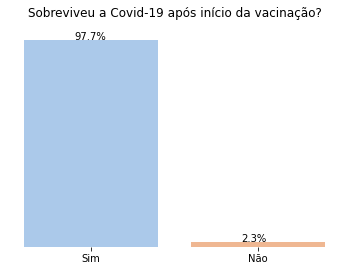

In [62]:
ax= sns.countplot(x='Óbito',data=obito_dvac, order=['Não', 'Sim'])


ax.set_title('Sobreviveu a Covid-19 após início da vacinação?', y=1.03)
sns.despine(left=True, bottom=True) #retirando os eixos
ax.set(xlabel='',
            ylabel='')

total = len(obito_dvac['Óbito'])*1.
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + 0.3
    y = p.get_y() + p.get_height() 
    ax.annotate(percentage, (x, y))
    
ax.axes.get_yaxis().set_visible(False) #tornando os valores do eixo y invisivel
plt.xticks(np.arange(2), ['Sim', 'Não'])
plt.show()

In [63]:
# df p/ mortes depois da vacinaçao
morte_dvac=obito_dvac[obito_dvac['Óbito']== 'Sim']

# df p/ mortes depois da vacinaçao
morte_avac=obito_avac[obito_avac['Óbito']== 'Sim']

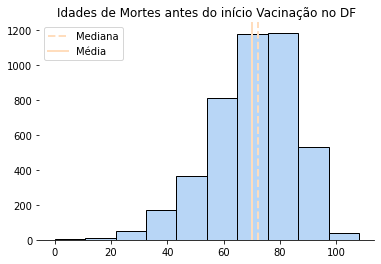

(72.0, 70.16543608675589)

In [64]:
ax=sns.histplot(morte_avac['Idade'], bins=10)

sns.despine(left=True) #retirando os eixos
ax.set(xlabel="", 
       ylabel="",
       title="Idades de Mortes antes do início Vacinação no DF")

# linhas verticais com mediana e média
mediana=morte_avac['Idade'].median()
media=morte_avac['Idade'].mean()
ax.axvline(x=mediana, color='#ffddbd', label='Mediana', linestyle='--', linewidth=2)
ax.axvline(x=media, color='#ffddbd', label='Média', linestyle='-', linewidth=2)

# apresenta a legenda e o gráfico
ax.legend()
plt.show()
mediana, media


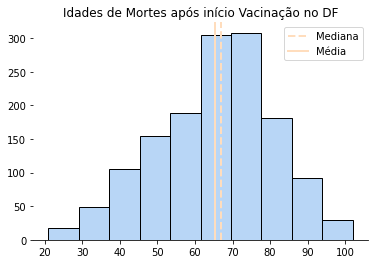

(67.0, 65.40670859538784)

In [65]:

#DPS DA VACINA
ax=sns.histplot(morte_dvac['Idade'], bins=10)

sns.despine(left=True) #retirando os eixos
ax.set(xlabel="", 
       ylabel="",
       title="Idades de Mortes após início Vacinação no DF")

# linhas verticais com mediana e média
mediana=morte_dvac['Idade'].median()
media=morte_dvac['Idade'].mean()
ax.axvline(x=mediana, color='#ffddbd', label='Mediana', linestyle='--', linewidth=2)
ax.axvline(x=media, color='#ffddbd', label='Média', linestyle='-', linewidth=2)

# apresenta a legenda e o gráfico
ax.legend()
plt.show()
mediana, media

In [66]:
morte_avac['Idade'].describe()

count    4334.000000
mean       70.165436
std        15.026896
min         0.000000
25%        61.000000
50%        72.000000
75%        81.000000
max       108.000000
Name: Idade, dtype: float64

In [67]:
morte_dvac['Idade'].describe()

count    1431.000000
mean       65.406709
std        15.270367
min        21.000000
25%        55.000000
50%        67.000000
75%        76.000000
max       102.000000
Name: Idade, dtype: float64

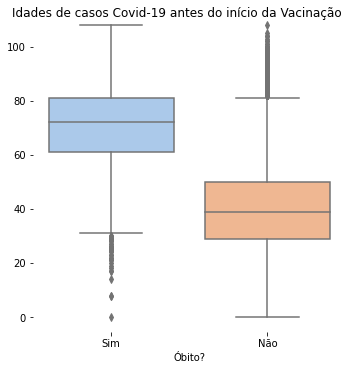

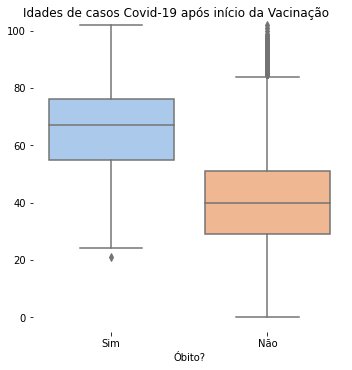

In [68]:
# antes da vacinaçao

ob=sns.catplot(y='Idade', x='Óbito', data= obito_avac, kind='box',  order=['Sim', 'Não'])
sns.despine(left=True, bottom=True)
ob.fig.suptitle('Idades de casos Covid-19 antes do início da Vacinação')
ob.set(xlabel="Óbito?", 
       ylabel="")
plt.show()
#dps vacinacao

ob=sns.catplot(y='Idade', x='Óbito', data= obito_dvac, kind='box')
sns.despine(left=True, bottom=True)
ob.fig.suptitle('Idades de casos Covid-19 após início da Vacinação')
ob.set(xlabel="Óbito?", 
       ylabel="")
plt.show()

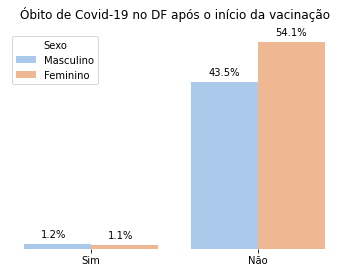

In [69]:
dosevac= sns.countplot(x='Óbito',data=obito_dvac, hue='Sexo')

dosevac.set_title('Óbito de Covid-19 no DF após o início da vacinação', y=1.03)
sns.despine(left=True, bottom=True) #retirando os eixos
dosevac.set(xlabel='',
            ylabel='')

total = len(obito_dvac['Óbito'])*1.
for p in dosevac.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + 0.1
    y = p.get_y() + p.get_height() + 1000
    dosevac.annotate(percentage, (x, y))

dosevac.axes.get_yaxis().set_visible(False) #tornando os valores do eixo y invisivel
plt.show()